In [31]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from sklearn.datasets import fetch_california_housing
cali_housing = fetch_california_housing(as_frame=True)

x = cali_housing.data
y = cali_housing.target

data = pd.DataFrame(x, columns=cali_housing.feature_names)
y = data["AveRooms"]
cali_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [33]:
print(cali_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [34]:
print(data.shape)

(20640, 8)


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [36]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [37]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False  

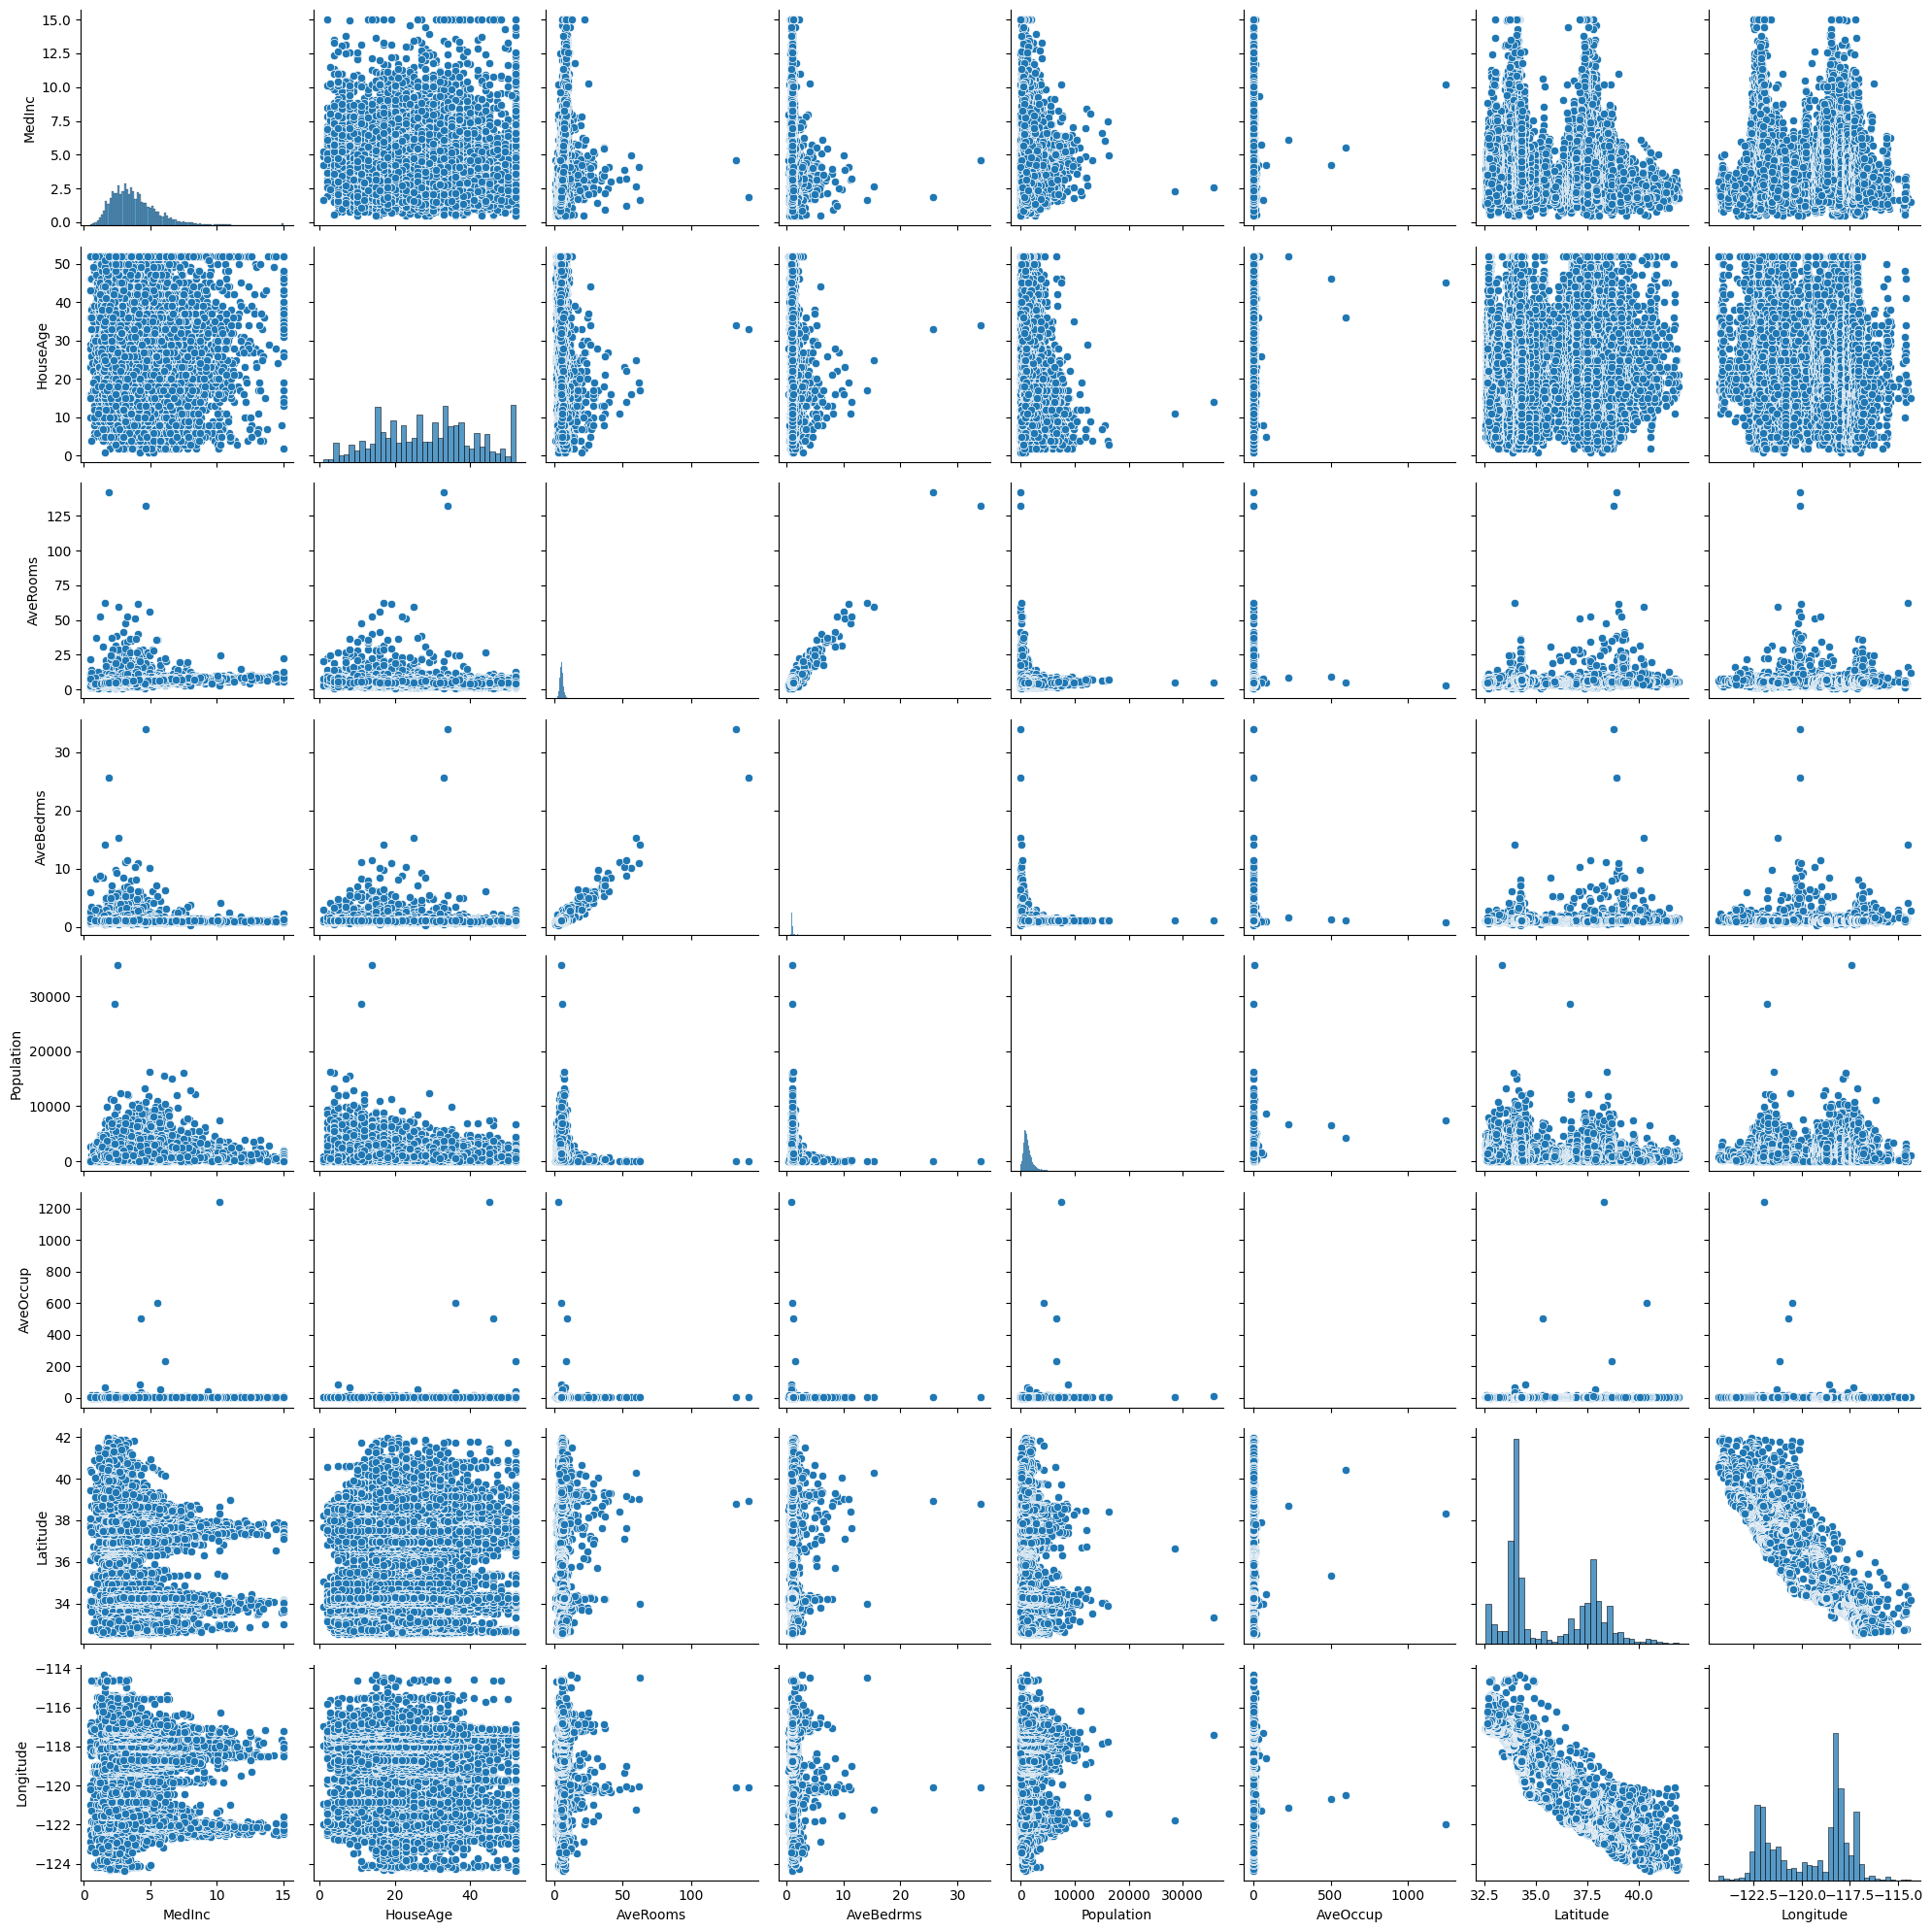

In [38]:
sns.pairplot(data, height=2.5) #plotting the features
plt.tight_layout()

/var/folders/27/6f8_b2s93672292qfv64h18h0000gn/T/ipykernel_50425/3709804381.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["AveRooms"]); #only printing the AveRooms graph


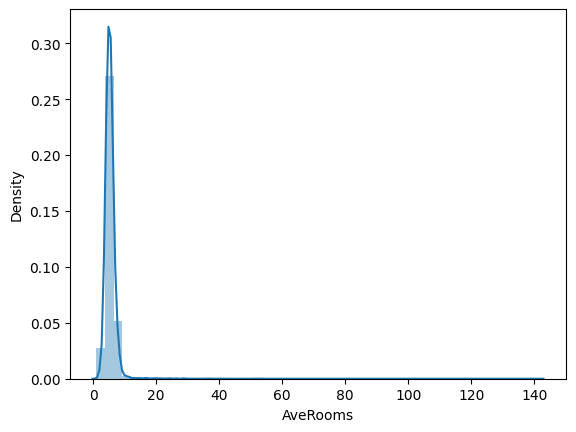

In [42]:
sns.distplot(data["AveRooms"]); #only printing the AveRooms graph

In [44]:
print("Skewness: %f" % data['AveRooms'].skew()) #gives the skewness
print("Kurtosis: %f" % data['AveRooms'].kurt()) #gives the kirtosis. This can help give outliers in the graph. 

Skewness: 20.697869
Kurtosis: 879.353264


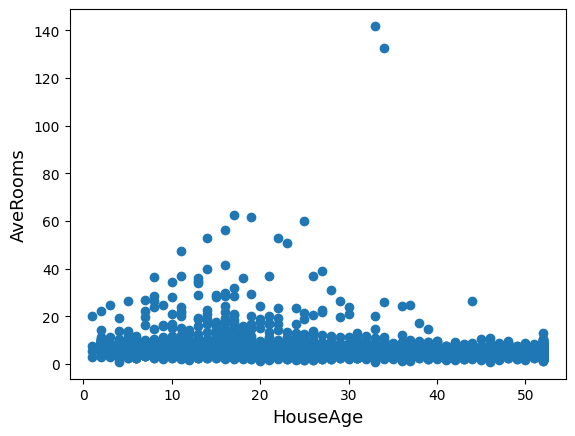

In [45]:
#comparing two columns in the dataset together
fig, ax = plt.subplots()
ax.scatter(x = data['HouseAge'], y = data['AveRooms'])
plt.ylabel('AveRooms', fontsize = 13)
plt.xlabel('HouseAge', fontsize = 13)
plt.show()

/var/folders/27/6f8_b2s93672292qfv64h18h0000gn/T/ipykernel_50425/1980387684.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AveRooms'], fit = norm);



 mu = 5.43 and sigma = 2.47



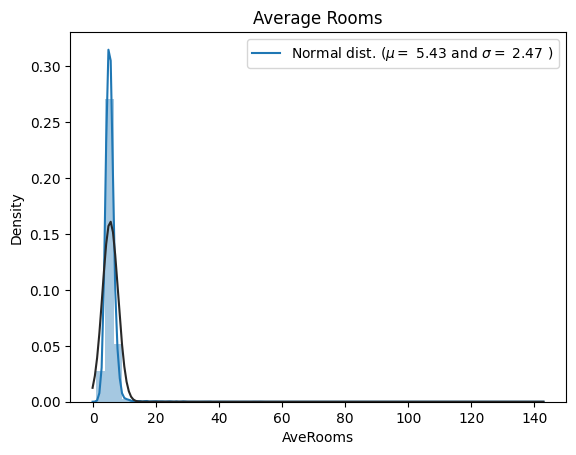

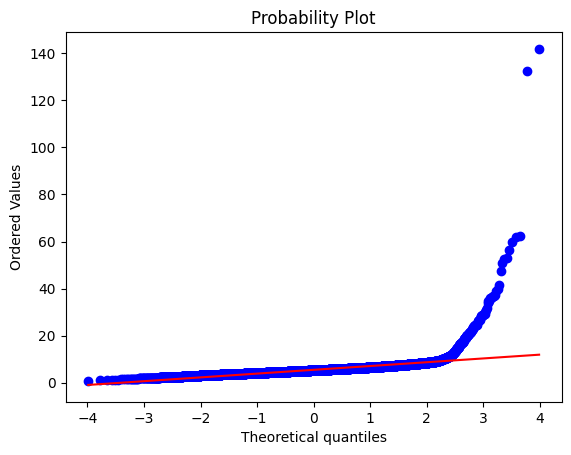

In [48]:
from scipy import stats
from scipy.stats import norm, skew #for some stats

sns.distplot(data['AveRooms'], fit = norm); #plotting normal distribution

(mu, sigma) = norm.fit(data['AveRooms'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma)) #{:.2f} python formatting to 2 d.p.

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Density')
plt.title('Average Rooms')

#Get the QQ-plot to help see the co-ordinate quantiles
fig = plt.figure()
res = stats.probplot(data['AveRooms'], plot=plt)
plt.show()

/var/folders/27/6f8_b2s93672292qfv64h18h0000gn/T/ipykernel_50425/1737136219.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AveRooms'], fit = norm); #plotting normal distribution



 mu = 1.83 and sigma = 0.23



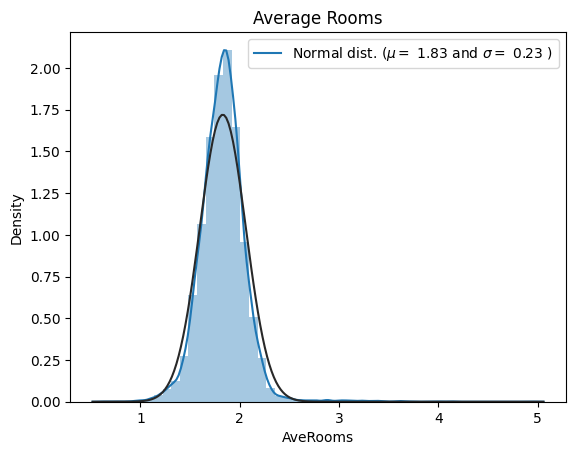

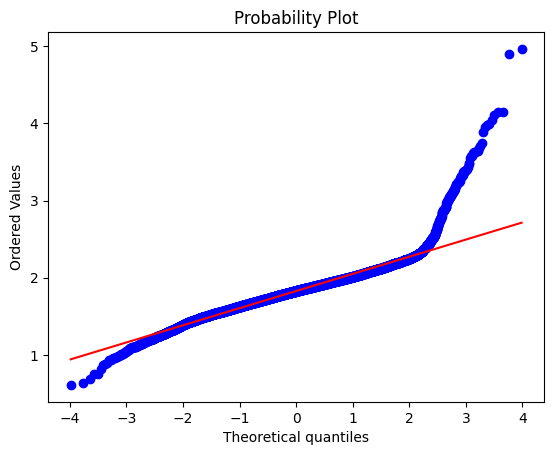

In [49]:
data["AveRooms"] = np.log1p(data["AveRooms"]) #creating a log to improve the accuracy of the floating point

sns.distplot(data['AveRooms'], fit = norm); 

(mu, sigma) = norm.fit(data['AveRooms'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Density')
plt.title('Average Rooms')

fig = plt.figure()
res = stats.probplot(data['AveRooms'], plot=plt)
plt.show()

Data Correlation

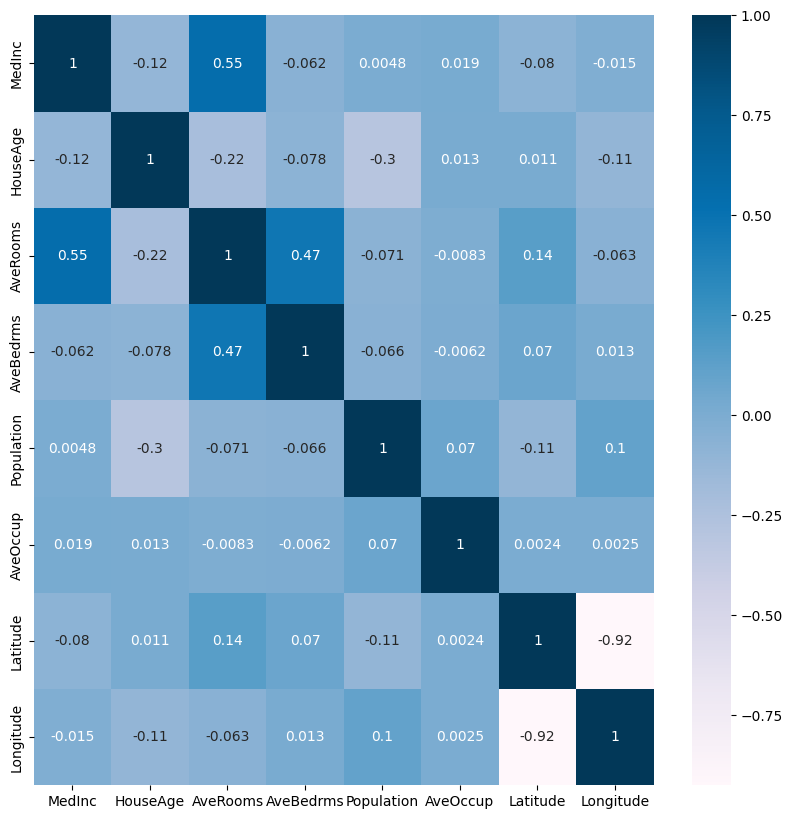

In [51]:
#showing the correlation between the features
plt.figure(figsize = (10,10))
cor = data.corr() #correlation instantiation
sns.heatmap(cor, annot = True, cmap = plt.cm.PuBu)
plt.show()

In [58]:
#selecting the features which are highly correlated
cor_target = abs(cor["AveRooms"]) #choosing the target feature

relevent_features = cor_target[cor_target>0.2] #getting the features that highly correlate

names = [index for index, value in relevent_features.items()] #getting the names of the features

names.remove('AveRooms') #removing the target feature

print(names)
print(len(names))

['MedInc', 'HouseAge', 'AveBedrms']
3


Model Building

In [59]:
from sklearn.model_selection import train_test_split #importing this to split the data into train and test data

x = data.drop("AveRooms", axis = 1) #using drop exlcudes x from being included in the average rooms
y = data["AveRooms"] #setting y to the average rooms
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [60]:
#outputs the co-ordinates which are for testing/training. 
#(16512, 7) is for training x
#(4128, 7) is for testing x etc...
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 7)
(4128, 7)
(16512,)
(4128,)


In [62]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train) #substituting in the parameters

LinearRegression()

In [63]:
pred = lr.predict(x_test) #predictions

print("Actual average rooms: ", y_test[0])
print("Model Predicited Value: ", pred[0])

Actual average rooms:  2.0774554437082067
Model Predicited Value:  1.7129924096561622


In [65]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse) #root mean squared error
print(mse)
print(rmse)

0.02494006087902844
0.15792422511770776
